In [3]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'Chewie_CO_20150630.mat'
ephys_file = h5py.File(file_path, 'r')
print(ephys_file['trial_data'].keys())

<KeysViewHDF5 ['M1_lfp', 'M1_lfp_guide', 'M1_spikes', 'M1_unit_guide', 'bin_size', 'date_time', 'idx_endTime', 'idx_goCueTime', 'idx_movement_on', 'idx_startTime', 'idx_tgtOnTime', 'idx_trial_end', 'idx_trial_start', 'monkey', 'result', 'tgtDir', 'vel']>


In [9]:
lfp_data = ephys_file['trial_data']['M1_lfp'][:]
dereferenced_lfp_data = []

for i in range(lfp_data.shape[0]):
    ref = lfp_data[i, 0]  # Each entry in spike_data is a reference
    if isinstance(ref, h5py.Reference):  # Check if it's a reference
        actual_data = ephys_file[ref][()]  # Dereference and get actual data (spike train)
        dereferenced_lfp_data.append(actual_data)

print("First few dereferenced lfp data entries:", dereferenced_lfp_data[:3])


First few dereferenced lfp data entries: [array([[  8.25760511,   1.28117995,  -7.6853823 , ...,  -9.36623511,
          0.66302155,   7.26866694],
       [ 42.87878155,  42.85923044,  42.71133739, ...,  74.33329646,
         74.671967  ,  74.25105982],
       [ 63.30163916,  56.91798101,  55.77898055, ...,  34.12527615,
         39.91647681,  43.72953584],
       ...,
       [ 31.05704444,  31.54764108,  43.01594377, ...,  67.60052589,
         65.31063961,  64.34749013],
       [142.16892331, 155.46692775, 139.95452356, ..., 155.39846802,
        156.48370434, 162.39390066],
       [ 27.14150786,  27.0805987 ,  21.76053676, ...,  23.152977  ,
         19.38651627,  23.01673615]]), array([[  7.52417904,   4.11947544,   3.18948721, ...,   6.97946834,
         11.63401358,   9.38977961],
       [ 70.9957223 ,  67.21002591,  62.8050974 , ...,  54.50958701,
         51.92080404,  48.78120789],
       [ 40.87755205,  44.51658557,  43.0147504 , ...,  29.07884461,
         33.56803795,  34.5

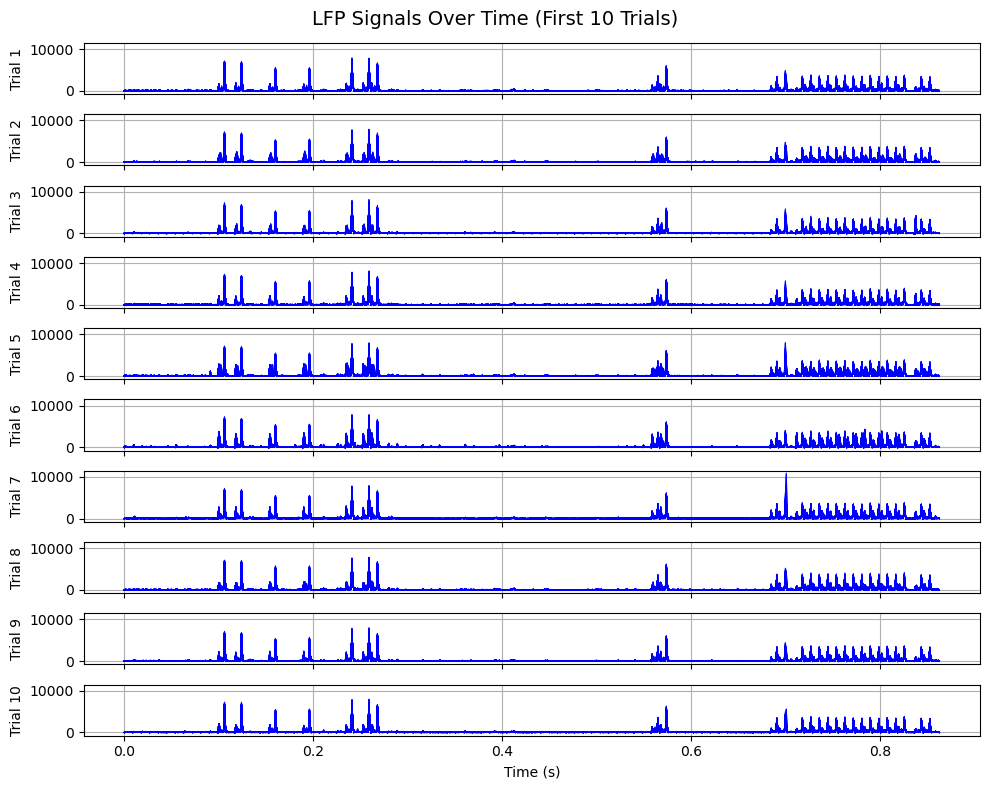

In [11]:
num_trials = 10  
sampling_rate = 1000  # Adjust this based on your dataset
time_window = 2  # Time window in seconds to display (adjust as needed)

# Create the figure and subplots
fig, axes = plt.subplots(num_trials, 1, figsize=(10, 8), sharex=True, sharey=True)

for i in range(num_trials):
    if i >= len(dereferenced_lfp_data):  # Prevent index error
        break
    
    lfp_trial = np.squeeze(dereferenced_lfp_data[i])  # Convert to 1D if needed
    time = np.arange(0, len(lfp_trial)) / sampling_rate  # Generate time axis

    # Limit to the first 'time_window' seconds
    time_idx = int(time_window * sampling_rate)
    time = time[:time_idx]
    lfp_trial = lfp_trial[:time_idx]

    axes[i].plot(time, lfp_trial, color='b', linewidth=0.8)
    axes[i].set_ylabel(f'Trial {i+1}')
    axes[i].grid(True)

# Labels for the last subplot
axes[-1].set_xlabel('Time (s)')
fig.suptitle('LFP Signals Over Time (First 10 Trials)', fontsize=14)
plt.tight_layout()
plt.show()
